## Маркетинговое исследование рынка компьютерных игр и игровых консолей

_Настоящее исследование представляет собой маркетинговый анализ рынка компьютерных игр в мире._

_Период исследования: 1980 – 2016 гг._

_Объект исследования: рынок компьютерных игр. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation)._      

_Предмет исследования: объем рынка, тенденции рынка компьютерных игр, факторы, влияющие на рынок, основные конкуренты, прогноз развития рынка и другие процессы_

**Цель исследования: анализ и прогноз развития рынка компьютерных игр**

## Содержание:
* [Шаг 1. Откройте файлы с данными и изучите общую информацию](#first-step)
* [Шаг 1. Вывод](#first-conclusion)
* [Шаг 2. Подготовьте данные](#second-step)
* [Шаг 2. Вывод](#second-conclusion)
* [Шаг 3. Проведите исследовательский анализ данных ](#third-step)
* [Шаг 3. Вывод](#third-conclusion)
* [Шаг 4. Составьте портрет пользователя каждого региона](#fourth-step)
* [Шаг 4. Вывод](#fourth-conclusion)
* [Шаг 5. Проверьте гипотезы](#fifth-step)
* [Шаг 5. Вывод](#fifth-conclusion)
* [Шаг 6. Общий вывод](#sixth-step)

### Шаг 1. Откройте файлы с данными и изучите общую информацию. <a class="anchor" id="first-step"></a>

<li>Описание данных</li>
<li>Name — название игры</li>
<li>Platform — платформа</li>
<li>Year_of_Release — год выпуска</li>
<li>Genre — жанр игры</li>
<li>NA_sales — продажи в Северной Америке (миллионы долларов)</li>
<li>EU_sales — продажи в Европе (миллионы долларов)</li>
<li>JP_sales — продажи в Японии (миллионы долларов)</li>
<li>Other_sales — продажи в других странах (миллионы долларов)</li>
<li>Critic_Score — оценка критиков (максимум 100)</li>
<li>User_Score — оценка пользователей (максимум 10)</li>
<li>Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.</li>

_Откроем файл данных_

In [67]:
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

df_games = pd.read_csv('vgsales.csv')

In [68]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

_Распечатаем общую информацию_

In [69]:
def file_info(df):
    printmd('**Общая информация - метод info**')
    print(df.info())
    printmd('**Названия столбцов**')
    print(df.columns)
    for col in df.columns:
        temp_str = '**Описание столбца ' + col + '**'
        printmd(temp_str)
        print(df[col].describe())
        if col == 'user_id':
            temp_str = '**Количество уникальных значений столбца ' + col + '**'
            printmd(temp_str)
            print(df[col].unique().size)         
    printmd('**Первые пять строк**')
    print(df.head())
    printmd('**Последние пять строк**')
    print(df.tail())
    printmd('**Есть ли дубликаты**')
    print(df.duplicated().sum())

In [70]:
file_info(df_games)

**Общая информация - метод info**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None


**Названия столбцов**

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')


**Описание столбца Rank**

count    16598.000000
mean      8300.605254
std       4791.853933
min          1.000000
25%       4151.250000
50%       8300.500000
75%      12449.750000
max      16600.000000
Name: Rank, dtype: float64


**Описание столбца Name**

count                           16598
unique                          11493
top       Need for Speed: Most Wanted
freq                               12
Name: Name, dtype: object


**Описание столбца Platform**

count     16598
unique       31
top          DS
freq       2163
Name: Platform, dtype: object


**Описание столбца Year**

count    16327.000000
mean      2006.406443
std          5.828981
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64


**Описание столбца Genre**

count      16598
unique        12
top       Action
freq        3316
Name: Genre, dtype: object


**Описание столбца Publisher**

count               16540
unique                578
top       Electronic Arts
freq                 1351
Name: Publisher, dtype: object


**Описание столбца NA_Sales**

count    16598.000000
mean         0.264667
std          0.816683
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.490000
Name: NA_Sales, dtype: float64


**Описание столбца EU_Sales**

count    16598.000000
mean         0.146652
std          0.505351
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         29.020000
Name: EU_Sales, dtype: float64


**Описание столбца JP_Sales**

count    16598.000000
mean         0.077782
std          0.309291
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: JP_Sales, dtype: float64


**Описание столбца Other_Sales**

count    16598.000000
mean         0.048063
std          0.188588
min          0.000000
25%          0.000000
50%          0.010000
75%          0.040000
max         10.570000
Name: Other_Sales, dtype: float64


**Описание столбца Global_Sales**

count    16598.000000
mean         0.537441
std          1.555028
min          0.010000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.740000
Name: Global_Sales, dtype: float64


**Первые пять строк**

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


**Последние пять строк**

        Rank                                              Name Platform  \
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year     Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
16593  2002.0  Platform       Kemco      0.01      0.00       0.0   
16594  2003.0   Shooter  Infogrames      0.01      0.00       0.0   
16595  2008.0    Racing  Activision      0.00      0.00       0.0   
16596  2010.0    Puzzle    7G//AMES      0.00      0.01       0.0   
16597  2003.0  Platform     Wanadoo      0.01      0.00       0.0   

       Other_Sales  Global_Sales  
16593          0.0          0.01  
16594          0.0          0.01  
16595          0.0          0

**Есть ли дубликаты**

0


_Посмотрим на пропущенные данные на графике_

Text(0.5, 1, 'Пропущенные значения')

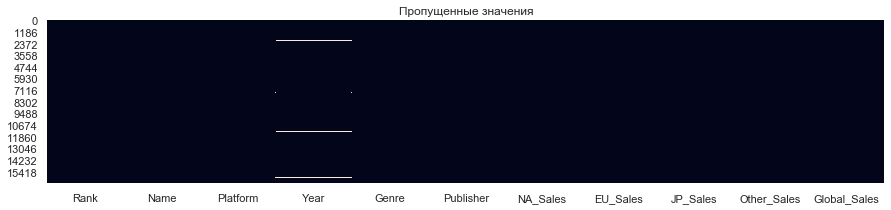

In [71]:
fig,ax = plt.subplots(figsize=(15,3)) 
sns.heatmap(df_games.isnull(), cbar = False, ax=ax).set_title("Пропущенные значения")

In [72]:
df_games[df_games['Year'].isna()].head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53


In [73]:
df_games[df_games['Publisher'].isna()].head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.0,0.41,3.00
1303,1305,Triple Play 99,PS,NaN,Sports,NaN,0.81,0.55,0.0,0.10,1.46
1662,1664,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007.0,Misc,NaN,0.87,0.32,0.0,0.02,1.21
2222,2224,Bentley's Hackpack,GBA,2005.0,Misc,NaN,0.67,0.25,0.0,0.02,0.93
3159,3161,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0.0,0.01,0.64


_В столбцах **Name** и **Genre** значения пропущены в одних и тех же строках. Строки с пропущенными данными в этих столбцах удалим._

In [74]:
df_games.query('Name =="Need for Speed: Most Wanted"') #больше всего экземпляров игры

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
252,253,Need for Speed: Most Wanted,PS2,2005.0,Racing,Electronic Arts,2.03,1.79,0.08,0.47,4.37
498,499,Need for Speed: Most Wanted,PS3,2012.0,Racing,Electronic Arts,0.71,1.51,0.06,0.61,2.89
1173,1175,Need for Speed: Most Wanted,X360,2012.0,Racing,Electronic Arts,0.62,0.80,0.01,0.15,1.58
1530,1532,Need for Speed: Most Wanted,X360,2005.0,Racing,Electronic Arts,1.00,0.17,0.02,0.10,1.29
1742,1744,Need for Speed: Most Wanted,PSV,2012.0,Racing,Electronic Arts,0.38,0.52,0.01,0.25,1.16
2005,2007,Need for Speed: Most Wanted,XB,2005.0,Racing,Electronic Arts,0.53,0.46,0.00,0.05,1.04
3585,3587,Need for Speed: Most Wanted,GC,2005.0,Racing,Electronic Arts,0.43,0.11,0.00,0.02,0.56
5900,5902,Need for Speed: Most Wanted,PC,2005.0,Racing,Electronic Arts,0.02,0.23,0.00,0.05,0.30
6149,6151,Need for Speed: Most Wanted,WiiU,2013.0,Racing,Electronic Arts,0.14,0.12,0.00,0.02,0.28
6278,6280,Need for Speed: Most Wanted,DS,2005.0,Racing,Electronic Arts,0.24,0.01,0.00,0.02,0.27


In [75]:
df_games['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [76]:
df_games['Year'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2003., 1986., 2000.,   nan, 1995., 2016., 1991., 1981., 1987.,
       1980., 1983., 2020., 2017.])

In [77]:
df_games.query('Year == 2020 | Year == 2017')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5957,5959,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.00,0.02,0.29
14390,14393,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.0,0.03,0.00,0.03
16241,16244,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.00,0.0,0.01,0.00,0.01
16438,16441,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.00,0.0,0.01,0.00,0.01


In [78]:
df_games.loc[5957,'Year'] = 2009 #https://www.amazon.com/Imagine-Makeup-Artist-DS-Nintendo/dp/B001SO6KN8
df_games.loc[14390,'Year'] = 2016 #http://www.bumped.org/psublog/pso2-episode-4-deluxe-package/
df_games.loc[16241,'Year'] = 2016 #http://www.bumped.org/psublog/pso2-episode-4-deluxe-package/
df_games.loc[16438,'Year'] = 2016 #https://brothersconflict.fandom.com/wiki/Brothers_Conflict_Precious_Baby
df_games['Year'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2003., 1986., 2000.,   nan, 1995., 2016., 1991., 1981., 1987.,
       1980., 1983.])

### Вывод <a class="anchor" id="first-conclusion"></a>

1. Таблицы имеет 11 столбцов. Данные с 1980 по 2020 год.
2. В двух столбцах пропущены данные. Это столбцы **Publisher**, **Year**
3. <font color="DodgerBlue">В столбцах **Name** и **Genre** значения пропущены в одних и тех же строках. Строки с пропущенными данными в этих столбцах удалили.</font>
4. Столбец **Publisher**. Пустые значения попытаемся заполнить исходя из названия игры, в противном случае удалим.
5. Столбец **Year**. Пустые значения попытаемся заполнить исходя из названия игры, в противном случае удалим
9. Название столбцов не содержать пробелов
10. Уникальные значения столбца **Platform** не содержат явных дубликатов и пробелов в названиях

<p style="color:green">Данные загружены и изучены, теперь можно присутпить к предобработке, отлично</p>

### Шаг 2. Подготовьте данные <a class="anchor" id="second-step"></a>

#### Что нужно сделать
<ul>
<li>Замените названия столбцов (приведите к нижнему регистру);</li>
<li>Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;</li>
<li>Обработайте пропуски при необходимости:
Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
Опишите причины, которые могли привести к пропускам;
<li>Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;</li>
<li>Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.</li>
</ul>

Привидем названия столбцов к нижнему регистру

In [79]:
list_columns = []
for str1 in df_games.columns:
    list_columns.append(str1.lower())
    
df_games.columns = list_columns

In [80]:
df_games.columns

Index(['rank', 'name', 'platform', 'year', 'genre', 'publisher', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'global_sales'],
      dtype='object')

В названии игры обнаружили проблемы в начале и в конце строки, а также вставки неотносящиеся к названию игры

In [81]:
df_games[df_games['name'].str.contains("hack")]

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
1563,1565,.hack//Infection Part 1,PS2,2002.0,Role-Playing,Atari,0.49,0.38,0.26,0.13,1.27
3002,3004,.hack//Mutation Part 2,PS2,2002.0,Role-Playing,Atari,0.23,0.18,0.20,0.06,0.68
4294,4296,.hack//Outbreak Part 3,PS2,2002.0,Role-Playing,Atari,0.14,0.11,0.17,0.04,0.46
5796,5798,South Park: Chef's Luv Shack,PS,1998.0,Misc,Acclaim Entertainment,0.17,0.12,0.00,0.02,0.31
6868,6870,South Park: Chef's Luv Shack,N64,1999.0,Misc,Acclaim Entertainment,0.19,0.05,0.00,0.00,0.24
7107,7109,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,Namco Bandai Games,0.11,0.09,0.00,0.03,0.23
8007,8009,.hack//Quarantine Part 4: The Final Chapter,PS2,2003.0,Role-Playing,Atari,0.09,0.07,0.00,0.02,0.18
8304,8306,.hack//G.U. Vol.3//Redemption,PS2,2007.0,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00,0.17
8357,8359,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00,0.17
8602,8604,.hack//G.U. Vol.2//Reminisce (jp sales),PS2,2006.0,Role-Playing,Namco Bandai Games,0.00,0.00,0.16,0.00,0.16


В названии слово .hack// явно лишнее

In [82]:
df_games.loc[7107, 'name'] #

'.hack//G.U. Vol.2//Reminisce'

В названии есть двойные пробелы

In [83]:
df_games[df_games['name'].str.contains("  ")]

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
3465,3467,FIFA: Road to World Cup 98,N64,1997.0,Sports,Electronic Arts,0.15,0.39,0.00,0.03,0.58
4528,4530,Hunter: The Reckoning Wayward,PS2,2003.0,Action,Interplay,0.21,0.16,0.00,0.06,0.43
10927,10929,U-Sing 2,Wii,2010.0,Misc,Mindscape,0.00,0.08,0.00,0.01,0.09
14967,14970,Rengoku II: The Stairway To H.E.A.V.E.N.,PSP,2006.0,Action,Konami Digital Entertainment,0.02,0.00,0.00,0.00,0.02
16011,16014,Tom Clancy's Ghost Recon Advanced Warfighter ...,X360,2006.0,Shooter,Ubisoft,0.00,0.00,0.01,0.00,0.01


Пробелы в начале и в конце строки с названием игры, а также лишнии слова типа hack возможно мешают нам определить уникальные названия игр. Поэтому мы их уберём с помощью фнукции

In [84]:
#strip()
def delete_spaces(row):
    value = row
    value = value.replace(".hack//",'')
    value = value.replace(".hack:",'')
    value = value.replace("  ",' ')
    value = value.strip() #удаляем пробелы в начале и в конце из названия игры
    return value


df_games['name'] = df_games['name'].apply(delete_spaces)

In [85]:
df_games[df_games['name'].str.contains("hack")]

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
5796,5798,South Park: Chef's Luv Shack,PS,1998.0,Misc,Acclaim Entertainment,0.17,0.12,0.0,0.02,0.31
6868,6870,South Park: Chef's Luv Shack,N64,1999.0,Misc,Acclaim Entertainment,0.19,0.05,0.0,0.00,0.24
10832,10834,Whacked!,XB,2002.0,Misc,Microsoft Game Studios,0.07,0.02,0.0,0.00,0.09


In [86]:
df_games[df_games['name'].str.contains("  ")]

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales


In [87]:
df_games['name'].unique().size

11492

Количество уникальных значений в столбце name уменьшилось на 1, но зато данные стали чище.
Теперь проверим столбец year.

In [88]:
print('Процент пустых значений {:.2%} \
в столбце year'.format(df_games[df_games['year'].isna()]['name'].count()/df_games.shape[0]))

Процент пустых значений 1.63% в столбце year


И, так имеем 1.63% процент пропущенных значений от всего набора данных. Возможно нам удастся восстановить год выпуска по названию игры.
Для это мы составим список уникальных наименований игр, у которых пропущен год выпуска

In [89]:
list_name = df_games[df_games['year'].isna()]['name'].unique()
df_games.query('name in @list_name')['name'].count()

477

In [90]:
df_games[df_games['year'].isna()]['name'].count()

271

In [91]:
df_games[df_games['year'].isna()]['name'].unique().size

233

Видим, что количество строк с пропущенными значениями в столбце year_of_release равно 271, количество уникальных значений столбца name из этих 271 стоставляет 233. А, вот количество записей по уникальным значениям названия игры в полном наборе данных составляет 477 шт. Следовательно, можно восстановить значение столбца year_of_release для 271 записей из 477.
Сначала, выделим из 271 записей игры, в названиях которых присутствует год.

In [92]:
arr = list(range(1980,2017))
dic = {}
for str_name in df_games[df_games['year'].isna()]['name'].unique():
    for year in arr:
        if (str_name.find(str(year)) > -1):
            dic[str_name] = year

In [93]:
dic #выделили из 271 записей игры, в названиях которых присутствует год.

{'Madden NFL 2004': 2004,
 'FIFA Soccer 2004': 2004,
 'wwe Smackdown vs. Raw 2006': 2006,
 'NASCAR Thunder 2003': 2003,
 'PES 2009: Pro Evolution Soccer': 2009,
 'Madden NFL 2002': 2002,
 'NFL GameDay 2003': 2003,
 'NBA Live 2003': 2003,
 'Tomb Raider (2013)': 2013,
 'All-Star Baseball 2005': 2005,
 'Tour de France 2011': 2011,
 'Sega Rally 2006': 2006,
 'Football Manager 2007': 2007,
 'PDC World Championship Darts 2008': 2008}

Теперь, на основании словоря dic заполним пропущенные значения в столбце year_of_release для некоторых строк

In [94]:
def fill_year(row):
    str_name = row['name']
    for key, value in dic.items():
        if str_name == key:
            return value
        

df_games.loc[(
    df_games['year'].isna()),'year'] = df_games[df_games['year'].isna()].apply(
    fill_year, axis =1 )

In [95]:
print('Количество записей с \
пропущеными значениями в year', df_games[df_games['year'].isna()]['name'].count())
print('Количество уникальных записей с \
пропущеными значениями в year', df_games[df_games['year'].isna()]['name'].unique().size)

Количество записей с пропущеными значениями в year 254
Количество уникальных записей с пропущеными значениями в year 219


Сгруппируем данные по наименованию и году выпуска.
Потом, с помощью функции для записей, где пропущен год, найдём по названию год

In [96]:
df1 = df_games.groupby(['name','year']).count().reset_index()
df1 = df1[['name','year']]
df1.head()

,name,year
0,'98 Koshien,1998.0
1,007 Racing,2000.0
2,007: Quantum of Solace,2008.0
3,007: The World is not Enough,2000.0
4,007: Tomorrow Never Dies,1999.0


In [97]:
def fill_year1(row):
    try:
        str_name = row['name']
        df_tmp = df1.query('name == @str_name')['year']
        df_tmp = df_tmp.reset_index(drop = True)
        value = df_tmp.loc[0]
        return value
    except: return row['year']


df_games.loc[df_games['year'].isna(),'year'] = \
df_games[df_games['year'].isna()].apply(fill_year1, axis =1 )

In [98]:
print('Процент пустых значений {:.2%} \
в столбце year_of_release'.format(df_games[df_games['year'].isna()]['name'].count()/df_games.shape[0]))

Процент пустых значений 0.84% в столбце year_of_release


Как видим, мы уменьшили количество пропущенных значений в столбце year в два раза. Строки, в которых нам не удалось заполнить пропуски в столбце year - удалим.

In [99]:
df_games = df_games.loc[~df_games['year'].isna()]
df_games.loc['year'] = df_games['year'].astype('int') #преобразование типов
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16459 entries, 0 to year
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          16458 non-null  float64
 1   name          16458 non-null  object 
 2   platform      16458 non-null  object 
 3   year          16458 non-null  float64
 4   genre         16458 non-null  object 
 5   publisher     16415 non-null  object 
 6   na_sales      16458 non-null  float64
 7   eu_sales      16458 non-null  float64
 8   jp_sales      16458 non-null  float64
 9   other_sales   16458 non-null  float64
 10  global_sales  16458 non-null  float64
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


Перейдём к столбцу critic_score

In [101]:
df_games['publisher'].isnull().sum() #количество пропцщенных значений до изменения

44

In [104]:
df_games['name'].value_counts(dropna = False)

Need for Speed: Most Wanted          12
Madden NFL 07                         9
LEGO Marvel Super Heroes              9
Ratatouille                           9
FIFA 14                               9
                                     ..
Halo: The Master Chief Collection     1
Star Fox: Zero                        1
Super Black Bass Fishing              1
ATV: Quad Frenzy                      1
NaN                                   1
Name: name, Length: 11366, dtype: int64

In [59]:
df_games[df_games['publisher'].isna()].head(15)

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
470,471.0,wwe Smackdown vs. Raw 2006,PS2,2006.0,Fighting,NaN,1.57,1.02,0.0,0.41,3.00
1662,1664.0,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007.0,Misc,NaN,0.87,0.32,0.0,0.02,1.21
2222,2224.0,Bentley's Hackpack,GBA,2005.0,Misc,NaN,0.67,0.25,0.0,0.02,0.93
3159,3161.0,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0.0,0.01,0.64
3166,3168.0,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.46,0.17,0.0,0.01,0.64
3766,3768.0,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.38,0.14,0.0,0.01,0.53
4145,4147.0,Sonic the Hedgehog,PS3,1991.0,Platform,NaN,0.00,0.48,0.0,0.00,0.48
4526,4528.0,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.31,0.11,0.0,0.01,0.43
4635,4637.0,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.30,0.11,0.0,0.01,0.42
5647,5649.0,Cartoon Network Collection: Game Boy Advance V...,GBA,2005.0,Misc,NaN,0.23,0.08,0.0,0.01,0.32


Пропущенные значения для игры одного года, но для разных платформ заполним значением из подобной записи

In [35]:
def fill_critic_score(row):
    try:
        str_name = row['name']
        year_tmp = row['year_of_release']
        df_tmp = df_games.query('name == @str_name & year_of_release == @year_tmp & ~critic_score.isnull()')['critic_score']
        df_tmp = df_tmp.reset_index(drop = True)
        value = df_tmp.loc[0]
        return value
    except: return row['critic_score']


df_games.loc[df_games['critic_score'].isna(),'critic_score'] = \
df_games[df_games['critic_score'].isna()].apply(fill_critic_score, axis =1 )

In [36]:
str_name = 'God Eater 2: Rage Burst'
df_games.query('name == @str_name & ~critic_score.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
4722,God Eater 2: Rage Burst,PSV,2015,Role-Playing,0.0,0.03,0.37,0.01,69.0,8.1,T
10326,God Eater 2: Rage Burst,PS4,2015,Role-Playing,0.0,0.01,0.09,0.00,69.0,8,T


In [37]:
df_games['critic_score'].isnull().sum() #количество пропцщенных значений до изменения

7776

_количество пропцщенных значений после изменения уменшили на 8.5%_  
_Теперь оставшиеся пропущеные значения заполним медианным значенияем в каждом из игровых жанров_

In [38]:
df_pv_critic_score = df_games.pivot_table(index='genre', values = 'critic_score' ,aggfunc = 'median')
df_pv_critic_score = df_pv_critic_score.reset_index()
df_pv_critic_score

,genre,critic_score
0,Action,68.0
1,Adventure,66.0
2,Fighting,72.0
3,Misc,69.0
4,Platform,69.0
5,Puzzle,70.0
6,Racing,69.0
7,Role-Playing,74.0
8,Shooter,73.0
9,Simulation,70.0


In [39]:
def fill_critic_score_median(row):
    try:
        str_name = row['genre']
        df_tmp = df_pv_critic_score.query('genre == @str_name')['critic_score']
        df_tmp = df_tmp.reset_index(drop = True)
        value = df_tmp.loc[0]
        return value
    except: return row['critic_score']
    
df_games.loc[df_games['critic_score'].isna(),'critic_score'] = \
df_games[df_games['critic_score'].isna()].apply(fill_critic_score_median, axis =1 )

In [40]:
df_games['critic_score'].isnull().sum()

0

In [41]:
df_games['critic_score'].unique()

array([76., 69., 82., 80., 74., 70., 89., 58., 87., 73., 91., 61., 97.,
       95., 77., 88., 83., 94., 93., 85., 86., 68., 66., 98., 96., 90.,
       84., 78., 92., 71., 72., 62., 75., 49., 42., 67., 81., 56., 43.,
       79., 59., 64., 60., 63., 50., 25., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 45., 51., 40.,
       46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23., 24.,
       21., 17., 13.])

_Как видим значений с дробной частью нет, а потому можно заменить тип данных столбца на int_

In [42]:
df_games = df_games.loc[~df_games['critic_score'].isna()]
df_games['critic_score'] = df_games['critic_score'].astype('int') #преобразование типов

_Теперь, перейдём к столбцу **user_score**_

In [43]:
df_games['user_score'].value_counts(dropna = False)

NaN    6636
tbd    2395
7.8     324
8       288
8.2     279
       ... 
1         2
0.3       2
0.2       2
9.7       1
0         1
Name: user_score, Length: 97, dtype: int64

Видим абревиатуру tbd. Оно може означать следующее: 
t.b.d.= to be defined. -  п.о. = подлежит определению/уточнению .
TBD = to be determined. -  ПО - Подлежит определению.
TBD is an abbreviation often meaning in ordinary writing "to be discussed" "to be done", "to be defined", "to be decided", "to be determined", "to be declared", "to be deleted", “to be denounced”, etc.  
Это значение и значение NaN заменим на медианное значение в игровом жанре

In [44]:
df_games.loc[df_games['user_score'] == "tbd",'user_score'] = None

In [45]:
df_games['user_score'] = df_games['user_score'].astype('float') #преобразование типов

In [46]:
df_games['user_score'].isnull().sum() #количество пропущенных значений до изменения

9031

Пропущенные значения для игры одного года, но для разных платформ заполним значением из подобной записи

In [47]:
def fill_user_score(row):
    try:
        str_name = row['name']
        year_tmp = row['year_of_release']
        df_tmp = df_games.query('name == @str_name & year_of_release == @year_tmp & ~user_score.isnull()')['user_score']
        df_tmp = df_tmp.reset_index(drop = True)
        value = df_tmp.loc[0]
        return value
    except: return row['user_score']


df_games.loc[df_games['user_score'].isna(),'user_score'] = \
df_games[df_games['user_score'].isna()].apply(fill_user_score, axis =1 )

In [48]:
df_games['user_score'].isnull().sum() #количество пропущенных значений после изменения 

8202

_Замена рейтингов по записям аналогичных игр, но на других платформах, позволило уменьшить количество пропущенных занчений на 9%.   Значение NaN заменим на медианное значение в игровом жанре._

In [49]:
df_pv_user_score = df_games.pivot_table(index='genre', values = 'user_score' ,aggfunc = 'median')
df_pv_user_score = df_pv_user_score.reset_index()
df_pv_user_score

,genre,user_score
0,Action,7.3
1,Adventure,7.5
2,Fighting,7.6
3,Misc,7.0
4,Platform,7.6
5,Puzzle,7.5
6,Racing,7.3
7,Role-Playing,7.8
8,Shooter,7.4
9,Simulation,7.5


In [50]:
def fill_user_score_median(row):
    try:
        str_name = row['genre']
        df_tmp = df_pv_user_score.query('genre == @str_name')['user_score']
        df_tmp = df_tmp.reset_index(drop = True)
        value = df_tmp.loc[0]
        return value
    except: return row['user_score']
    
df_games.loc[df_games['user_score'].isna(),'user_score'] = \
df_games[df_games['user_score'].isna()].apply(fill_user_score_median, axis =1 )

In [51]:
df_games['user_score'].isnull().sum()

0

_Чтобы пользовательские рейтинги и рейтинги критиков были в одной шкале, польззовательские рейтинги умножим на 10.  
И после этого поменяем типа столбца на int_

In [52]:
df_games['user_score'] = df_games['user_score'].apply(lambda x: x * 10)
df_games['user_score'] = df_games['user_score'].astype('int') #преобразование типов
df_games['user_score'].value_counts()

75    2158
73    2054
74    1639
70    1476
78    1457
      ... 
7        2
6        2
5        2
97       1
0        1
Name: user_score, Length: 95, dtype: int64

In [53]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16574 entries, 0 to 16714
Data columns (total 11 columns):
name               16574 non-null object
platform           16574 non-null object
year_of_release    16574 non-null int64
genre              16574 non-null object
na_sales           16574 non-null float64
eu_sales           16574 non-null float64
jp_sales           16574 non-null float64
other_sales        16574 non-null float64
critic_score       16574 non-null int64
user_score         16574 non-null int64
rating             9871 non-null object
dtypes: float64(4), int64(3), object(4)
memory usage: 1.5+ MB


_Теперь. столбец **rating**_

In [54]:
df_games['rating'].isnull().sum() #количество пропущенных значений до изменения

6703

Пропущенные значения для игры одного года, но для разных платформ заполним значением из подобной записи

In [55]:
def fill_rating(row):
    try:
        str_name = row['name']
        year_tmp = row['year_of_release']
        df_tmp = df_games.query('name == @str_name & year_of_release == @year_tmp & ~rating.isnull()')['rating']
        df_tmp = df_tmp.reset_index(drop = True)
        value = df_tmp.loc[0]
        return value
    except: return row['rating']


df_games.loc[df_games['rating'].isna(),'rating'] = \
df_games[df_games['rating'].isna()].apply(fill_rating, axis =1 )

In [56]:
df_games['rating'].isnull().sum() #количество пропущенных значений после изменения 

6475

Замена рейтингов по записям аналогичных игр, но на других платформах, позволило уменьшить количество пропущенных занчений на 3.5%.

Описание рейтингов ESRB (Entertainment Software Rating Board) https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board
«RP» («Rating Pending») — «Рейтинг ожидается»
Все остальные пропущенные значения в этом столбце заменим на «RP». Это значение очень подходит.

In [57]:
df_games.loc[df_games['rating'].isna(),'rating'] = 'RP' #«RP» («Rating Pending») — «Рейтинг ожидается»:

In [58]:
df_games['rating'].unique() 

array(['E', 'RP', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC'], dtype=object)

_This rating was known as Kids to Adults (K-A) until 1998, when it was renamed "Everyone"  
Следовательно, его можно заменить на рейтинг E, тем самым мы избавимся от дубликатов._

In [59]:
df_games.loc[df_games['rating'] == 'K-A','rating'] = 'E'

In [60]:
df_games['rating'].unique()

array(['E', 'RP', 'M', 'T', 'E10+', 'AO', 'EC'], dtype=object)

In [61]:
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,80,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69,76,RP
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,83,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,80,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,74,78,RP


In [62]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16574 entries, 0 to 16714
Data columns (total 11 columns):
name               16574 non-null object
platform           16574 non-null object
year_of_release    16574 non-null int64
genre              16574 non-null object
na_sales           16574 non-null float64
eu_sales           16574 non-null float64
jp_sales           16574 non-null float64
other_sales        16574 non-null float64
critic_score       16574 non-null int64
user_score         16574 non-null int64
rating             16574 non-null object
dtypes: float64(4), int64(3), object(4)
memory usage: 1.5+ MB


In [63]:
df_games.duplicated().sum()

0

_Все возможнные пропущенные значения мы заполнили.  
Добавим столбец sales, в который запищем суммарную прибыль от игры. Этот столбец нам пригодится для последующего анализа_

In [64]:
df_games['sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']

In [65]:
df_games.query('na_sales == 0 & eu_sales == 0 & jp_sales == 0').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
8045,Summer Athletics: The Ultimate Challenge,PS2,2008,Sports,0.0,0.0,0.0,0.18,48,74,E,0.18
16676,G1 Jockey 4 2008,PS3,2008,Sports,0.0,0.0,0.0,0.00,75,74,RP,0.00
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.0,0.0,0.0,0.00,69,73,RP,0.00


Вероятное игры не могли преодолеть порог значимых продаж, либо просто отсутствуют данные по ним. Можно было бы удалить строки 16676 и 16709, но их всего две

### Вывод. <a class="anchor" id="second-conclusion"></a>

1. Названия столбцов привили к нижнему регистру
2. Убрали пропущенные значения во всех столбцах.
3. Удалили 141 запись или 0.8% от исходного набора данных.
4. Поменяли тип у столбцов **year_of_release**, **critic_score** и **user_score**
5. Удалили дублирующие значения в столбце **rating**
6. Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец **sales**.
7. Как было показано в [Шаг 1. Вывод](#first-conclusion) пропущенные значения в рейтингах образованы тем, что нет централизованного рейтинговой ассоциации. Согласно статье https://kids.kaspersky.ru/articles/games/gaming-age-ratings/ свои рейтинговые ассоциации имеют Россия, Европа, Германия(казалось  страна член ЕС), США и Австралия. Все они были созданы намного позднее, чем появились первые продажи игр. В текущем наборе данных  значения столбца **rating** это рейтинги от рейтинговой ассоциации из США.

### Шаг 3. Проведите исследовательский анализ данных <a class="anchor" id="third-step"></a>

#### Что нужно сделать
<ul>
<li>Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?</li>
<li>Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
<li>Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.</li>
<li>Не учитывайте в работе данные за предыдущие годы.</li>
<li>Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.</li>
<li>Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.</li>
<li>Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.</li>
<li>Соотнесите выводы с продажами игр на других платформах.</li>
<li>Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?</li>

_Посмотрим на график количества игр по годам выпуска_

In [66]:
import numpy as np

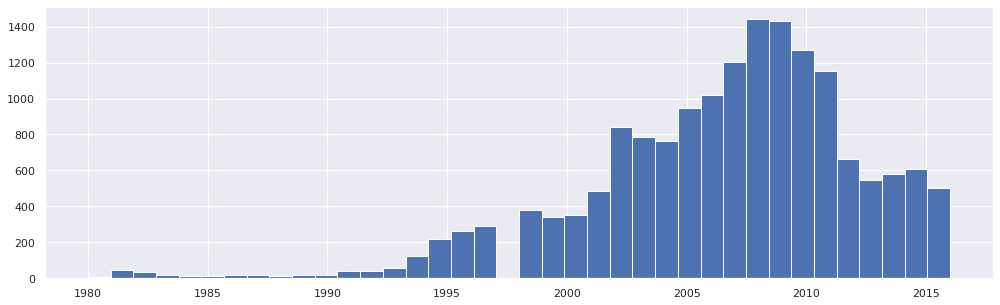

In [67]:
fig = plt.figure(figsize=(17,5))
df_games['year_of_release'].hist(bins = df_games['year_of_release'].unique().size + 1)
plt.show()

_Видно, что данных за года ранее 1995 года очень мало и это очень далёкое прошлое, следовательно их можно не учитывать в анализе. Удивляет, резко двухкратное падение после 2011 года._
_Посмотрим на следующем графике, как менялись продажи по платформам_

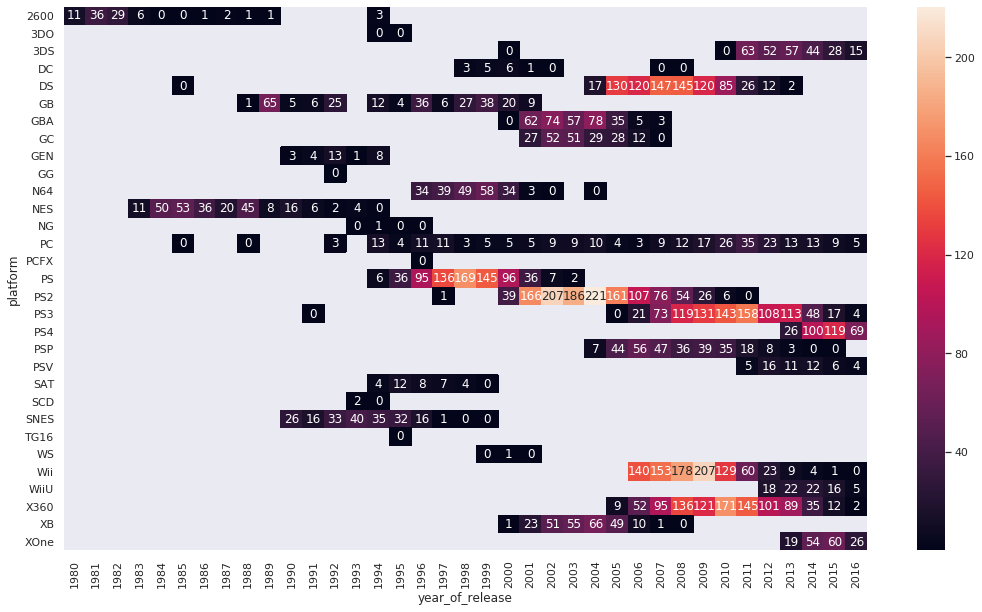

In [68]:
pv1 = df_games.pivot_table(index = 'platform', columns = 'year_of_release' , values = 'sales', aggfunc = 'sum')
f, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(pv1, annot=True, fmt=".0f", ax=ax)
plt.show()

_На следующем графике платформы с суммарными продажами._

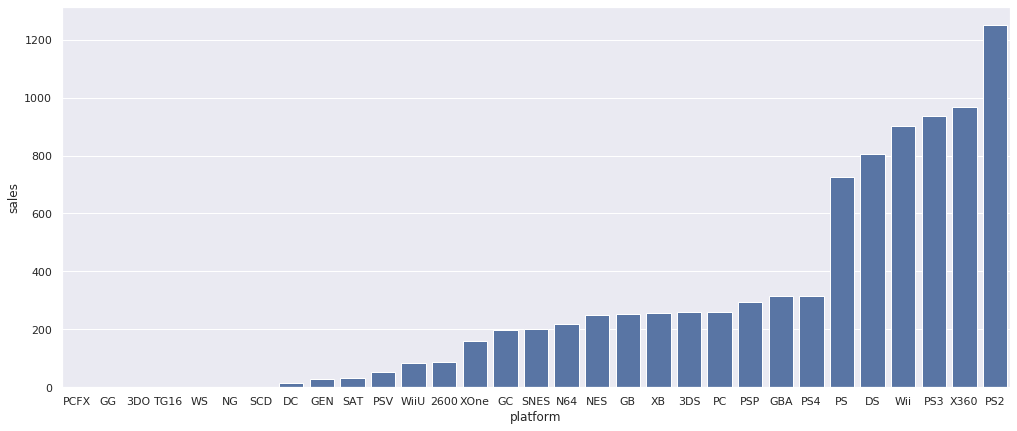

In [69]:
df_g1 = df_games.groupby(['platform']).sales.sum().reset_index().sort_values('sales').reset_index(drop = True)
f, ax = plt.subplots(figsize=(17, 7))
sns.barplot(x='platform', y='sales', data=df_g1,  color="b")
plt.show()

_Из предыдущего графика видно, что платформы с наибольшими суммарными продажами это 'PS','DS', 'Wii', 'PS3', 'X360', 'PS2'.  
На следующем графике платформы с наибольшими  суммарными продажами и их распределение по годам._

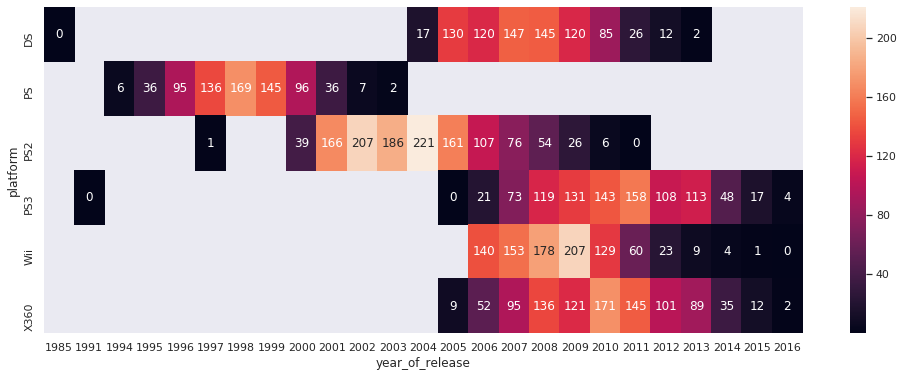

In [70]:
list_games = ['PS','DS', 'Wii', 'PS3', 'X360', 'PS2']
df_q1 = df_games.query('platform in @list_games')
pv2 = df_q1.pivot_table(index = 'platform', columns = 'year_of_release' , values = 'sales', aggfunc = 'sum')
f, ax = plt.subplots(figsize=(17, 6))
sns.heatmap(pv2, annot=True, fmt=".0f", ax=ax)
plt.show()

_На грфике видно ошибки в появлении сведений об продажах для некоторых платформ раньше, чем эти платформы появились.  
На вопрос "За какой характерный срок появляются новые и исчезают старые платформы?" ответит следующий график_

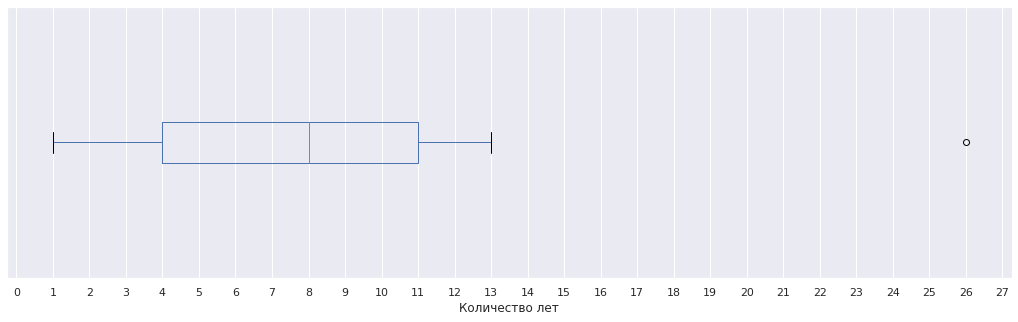

In [71]:
gt1 = df_games.groupby(['platform','year_of_release']).size()
gt2 = pd.DataFrame(gt1.reset_index())
gt3 = gt2.groupby('platform').year_of_release.count()
gt3 = gt3.reset_index()
fig = plt.figure(figsize=(18,5))
ax = plt.subplot()
ax.set_xticks(range(0, 30))
gt3.boxplot(vert=False, ax = ax)
plt.yticks([])
plt.xlabel('Количество лет')
plt.show()

_И так, медианное время жизни игравой платформы составляет 8 лет. Исключением является PC - персональный компьютер._  
_Соответственно актуальный период на основании, которого мы будем делать прогнох составляет 8 лет. На основании этого периода мы увидим возхождение новых версий платформ и закат их старых аналогов_

In [76]:
df_games_A = df_games.query('year_of_release >= 2009').copy()

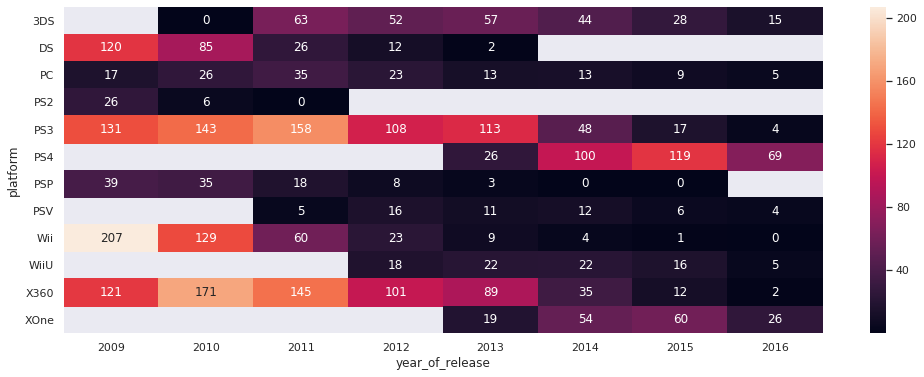

In [73]:
pv2 = df_games_A.pivot_table(index = 'platform', columns = 'year_of_release' , values = 'sales', aggfunc = 'sum')
f, ax = plt.subplots(figsize=(17, 6))
sns.heatmap(pv2, annot=True, fmt=".0f", ax=ax)
plt.show()

_Рынок поделен между MS(XOne, X360), Nintendo(Wii, WiiU, 3DS, DS), Sony(PS*) и PC_  
_Создадим столбец, в которой запишем категории платформ_

In [106]:
def category_platform(row):
    platform_tmp = row['platform']
    if platform_tmp == 'XOne' or platform_tmp == 'X360':
        return 'Microsoft Xbox'
    if platform_tmp == 'Wii' or platform_tmp == 'WiiU':
        return 'Nintendo Wii'
    if platform_tmp == '3DS' or platform_tmp == 'DS':
        return 'Nintendo Portable'
    if platform_tmp == 'PS2' or platform_tmp == 'PS3' or platform_tmp == 'PS4':
        return 'Sony PlayStation'
    if platform_tmp == 'PSP' or platform_tmp == 'PSV':
        return 'Sony PlayStation Portable'
    return 'PC'
    
df_games_A['category_platform'] = df_games_A.apply(category_platform, axis = 1)

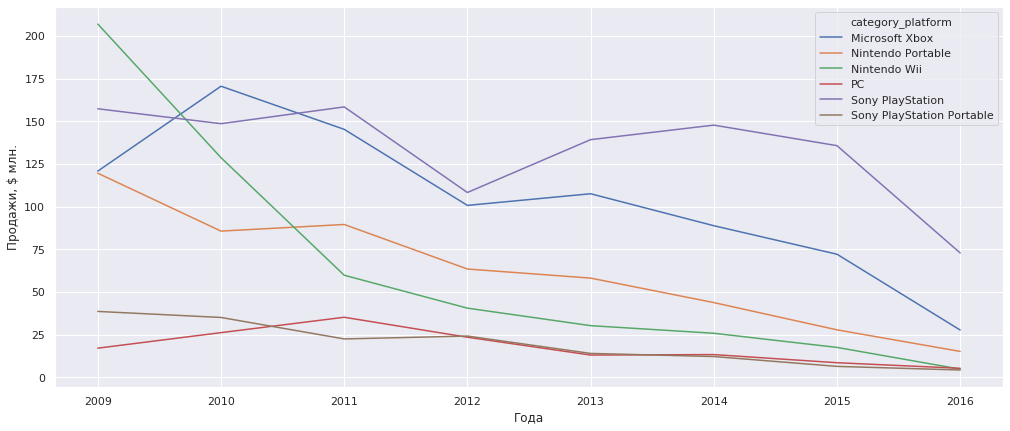

In [80]:
df_g2 = df_games_A.groupby(['category_platform','year_of_release']).sales.sum().reset_index()
f, ax = plt.subplots(figsize=(17, 7))
sns.lineplot(x = 'year_of_release', y = 'sales' , hue = 'category_platform', data = df_g2) 
plt.xlabel('Года') #заголовок оси Х
plt.ylabel('Продажи, $ млн.') #заголовок оси Y
plt.show()

_Исходя из двух предыдущих двух графиков. Ставку можно делать на Sony PlayStation PS4, Microsoft Xbox XOne и  Nintendo Portable 3DS_

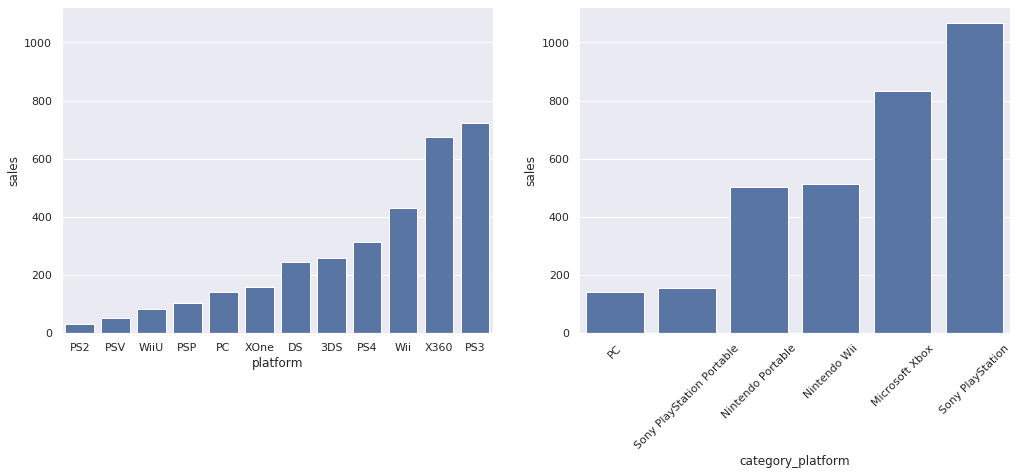

In [86]:
df_g2 = df_games_A.groupby(['platform']).sales.sum().reset_index().sort_values('sales').reset_index(drop = True)
fig = plt.figure(figsize=(17,6))
ax1 = fig.add_subplot(1,2,1)
sns.barplot(x='platform', y='sales', data=df_g2,  color="b", ax=ax1)
df_g3 = df_games_A.groupby(['category_platform']).sales.sum().reset_index().sort_values('sales').reset_index(drop = True)
ax2 = fig.add_subplot(1,2,2, sharey=ax1)
sns.barplot(x='category_platform', y='sales', data=df_g3,  color="b", ax=ax2)
plt.xticks(rotation=45) 
plt.show()

_Построим график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам._

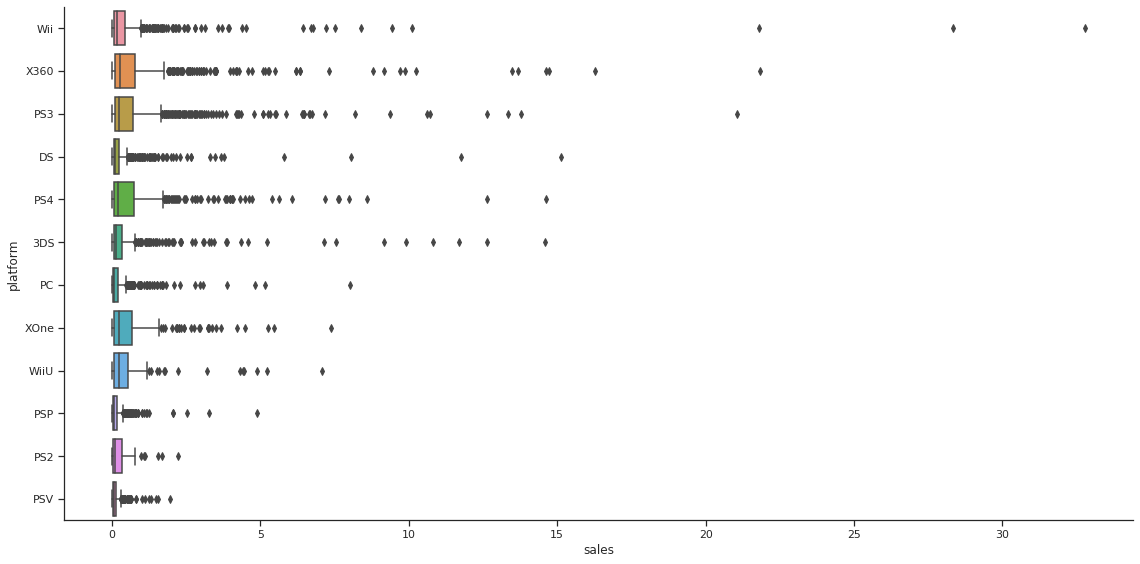

In [89]:
with sns.axes_style(style='ticks'):
    g = sns.catplot('sales', 'platform', data=df_games_A, kind="box", orient='h', height=8, aspect=2)

_Слишком много выбросов. Уберём их_

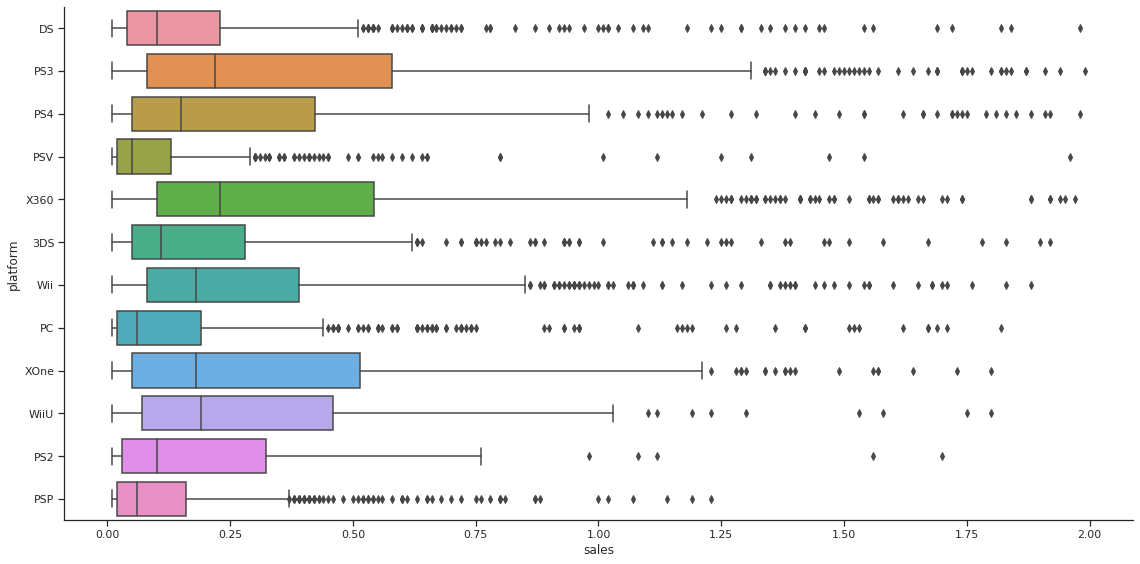

In [93]:
df_q3 = df_games_A.query('sales < 2')
with sns.axes_style(style='ticks'):
    g = sns.catplot('sales', 'platform', data=df_q3, kind="box", orient='h', height=8, aspect=2)

_Тот же график только по категориям платформ. На каких производителей игровых платформ стоит ориентироваться_

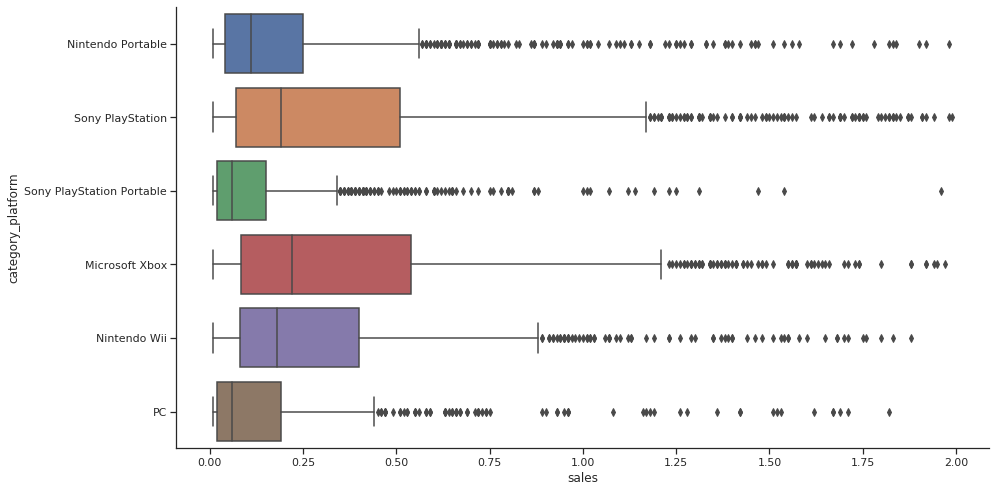

In [100]:
df_q3 = df_games_A.query('sales < 2')
with sns.axes_style(style='ticks'):
    g = sns.catplot('sales', 'category_platform', data=df_q3, kind="box", orient='h', height=7, aspect=2)

_У всех наблюдаются низкие значения медианы посравнению со средним значением. Так же присутствуют много выбросов, которые по всей видимости являются хитами. Если рассматривать перписктивные платформы Sony PlayStation PS4, Microsoft Xbox XOne и Nintendo Portable 3DS, то у Sony PlayStation PS4 продаж больше чем у Microsoft Xbox XOne, в тоже время у Microsoft Xbox XOne медианная и средняя цена игры больше_

_Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройм диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами._
_Посторим таблицу корреляции для актуального периода_

In [110]:
def color_corr(value):
    if value < - 0.5:
        color = 'red'
    elif value > 0.5:
        color = 'green'
    else:
        color = 'black'
    return 'color: %s' % color

df_games_A.corr().style.applymap(color_corr)

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sales
year_of_release,1,-0.0408008,0.0223792,0.0226784,-0.00305447,0.0905743,-0.0711864,-0.00827581
na_sales,-0.0408008,1,0.794074,0.347243,0.806361,0.232091,-0.00704363,0.939325
eu_sales,0.0223792,0.794074,1,0.355204,0.927983,0.250162,-0.0160797,0.928168
jp_sales,0.0226784,0.347243,0.355204,1,0.296919,0.0996588,0.107283,0.515336
other_sales,-0.00305447,0.806361,0.927983,0.296919,1,0.259171,-0.00665701,0.905875
critic_score,0.0905743,0.232091,0.250162,0.0996588,0.259171,1,0.431316,0.253793
user_score,-0.0711864,-0.00704363,-0.0160797,0.107283,-0.00665701,0.431316,1,0.00919568
sales,-0.00827581,0.939325,0.928168,0.515336,0.905875,0.253793,0.00919568,1


_Посторим таблицу корреляции для актуального периода и одной популярной платформы. Также уберём выбросы по продажам и огрначим их в 2млн._

In [112]:
df_games_A.query('platform == "PS4" & sales < 2').corr().style.applymap(color_corr)

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sales
year_of_release,1,-0.28477,-0.271473,0.00297793,-0.295689,0.0427508,0.145775,-0.293509
na_sales,-0.28477,1,0.703034,0.0819013,0.934471,0.270464,-0.0778627,0.906021
eu_sales,-0.271473,0.703034,1,0.122907,0.907935,0.218379,-0.0101704,0.925751
jp_sales,0.00297793,0.0819013,0.122907,1,0.107597,0.0998601,0.176944,0.229631
other_sales,-0.295689,0.934471,0.907935,0.107597,1,0.269236,-0.0462143,0.990151
critic_score,0.0427508,0.270464,0.218379,0.0998601,0.269236,1,0.572025,0.270465
user_score,0.145775,-0.0778627,-0.0101704,0.176944,-0.0462143,0.572025,1,-0.0230488
sales,-0.293509,0.906021,0.925751,0.229631,0.990151,0.270465,-0.0230488,1


_Посторим график рассеивания между отзывами критиков и продажами для одной популярной и перспективной платформы_

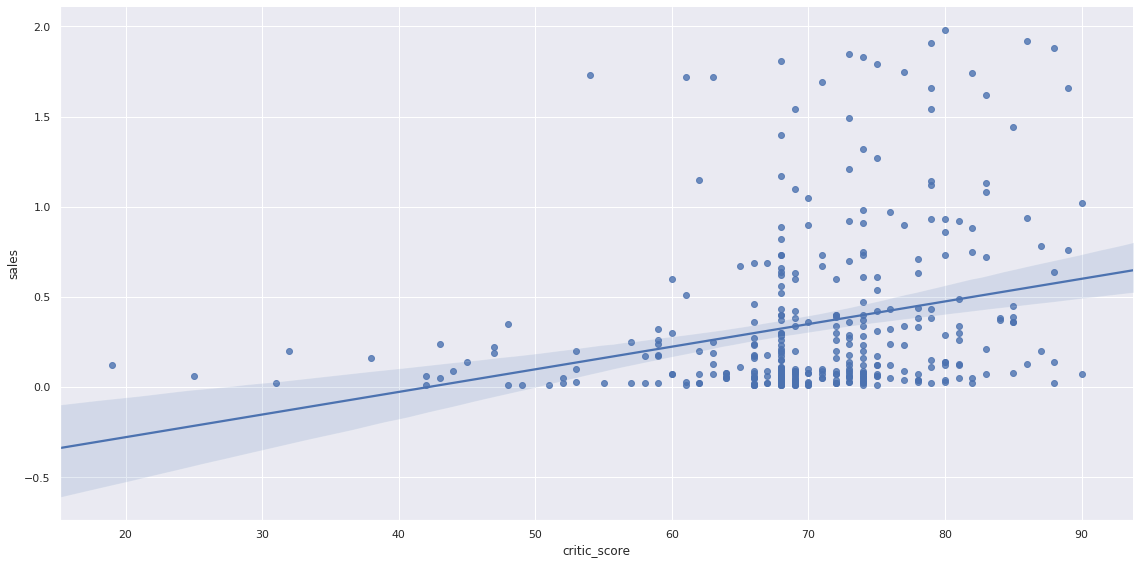

In [130]:
g = sns.lmplot(x='critic_score', y='sales', height=8, aspect=2, data=df_games_A.query('platform == "PS4" & sales < 2'))

_Посторим график рассеивания между отзывами пользователей и продажами для одной популярной и перспективной платформы_

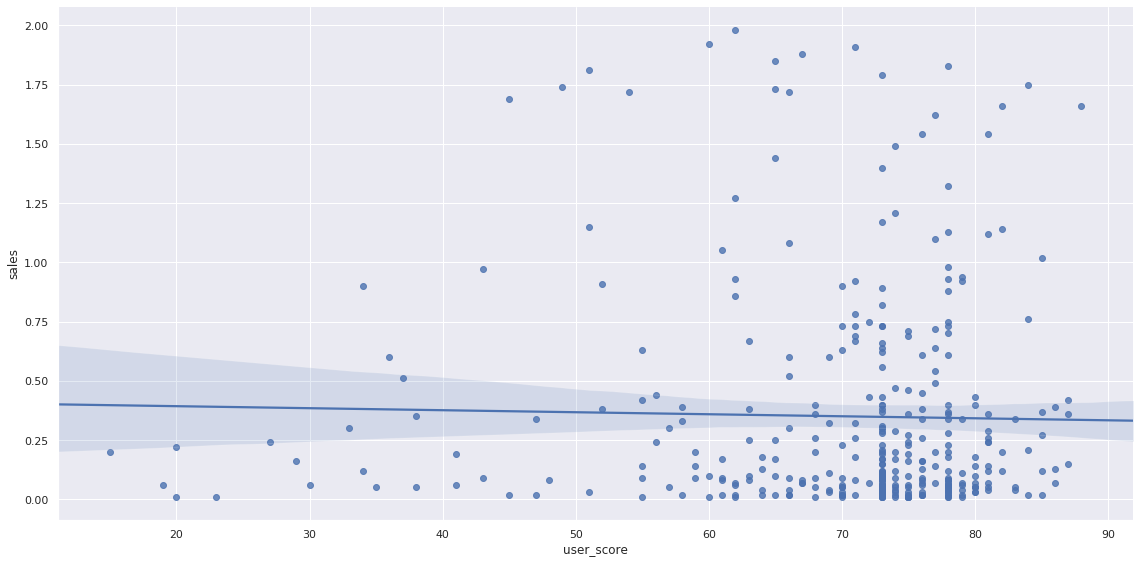

In [113]:
g = sns.lmplot(x='user_score', y='sales', height=8, aspect=2, data=df_games_A.query('platform == "PS4" & sales < 2'))

_Есть слабая корреляция между отзывами критиков и продажами, между отзывами пользователей и продажами нулевая корреляция. Компаниям, которые выпускают игры, нужно оплачивать экспертов, которые объяснят пользователям что им нужно. Также присутствует сильная корреляция между европейским рынком и другими рынками_

_Посмотрим на общее распределение игр по жанрам._

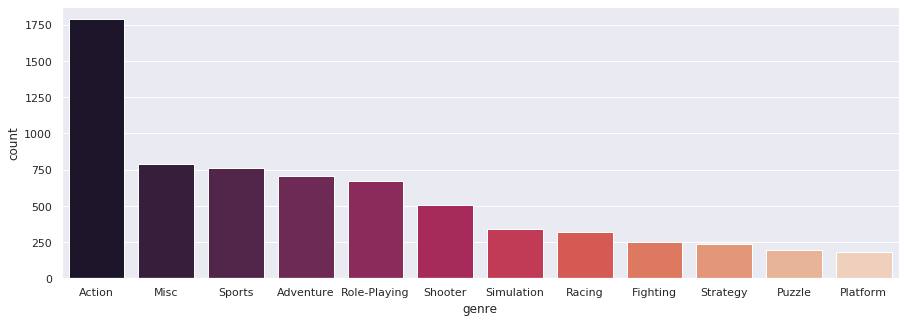

In [116]:
df_q4 = pd.DataFrame(df_games_A['genre'].value_counts().reset_index())
df_q4.columns =  ['genre','count']
fig = plt.figure(figsize=(15,5))
sns.barplot(x=df_q4['genre'], y=df_q4['count'], palette="rocket")
plt.show()

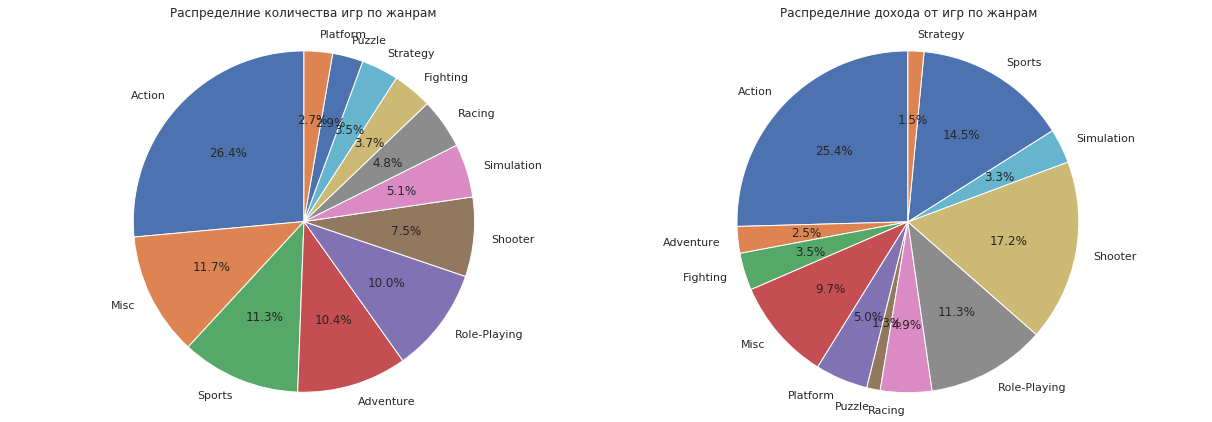

In [138]:
# Pie chart
labels1 = df_q4['genre']
sizes1 = df_q4['count']

fig = plt.figure(figsize=(17,6))
ax1 = fig.add_subplot(1,2,1)
ax1.pie(sizes1, labels=labels1, autopct='%1.1f%%', shadow=False, startangle=90)
ax1.axis('equal')
plt.title('Распределние количества игр по жанрам', pad = 20 )
plt.tight_layout()

df_q5 = df_games_A.groupby('genre').sales.sum().reset_index()
labels2 = df_q5['genre']
sizes2 = df_q5['sales']
ax2 = fig.add_subplot(1,2,2)
ax2.pie(sizes2, labels=labels2, autopct='%1.1f%%', shadow=False, startangle=90)
ax2.axis('equal')  
plt.title('Распределние дохода от игр по жанрам', pad = 20 )
plt.tight_layout()

plt.show()

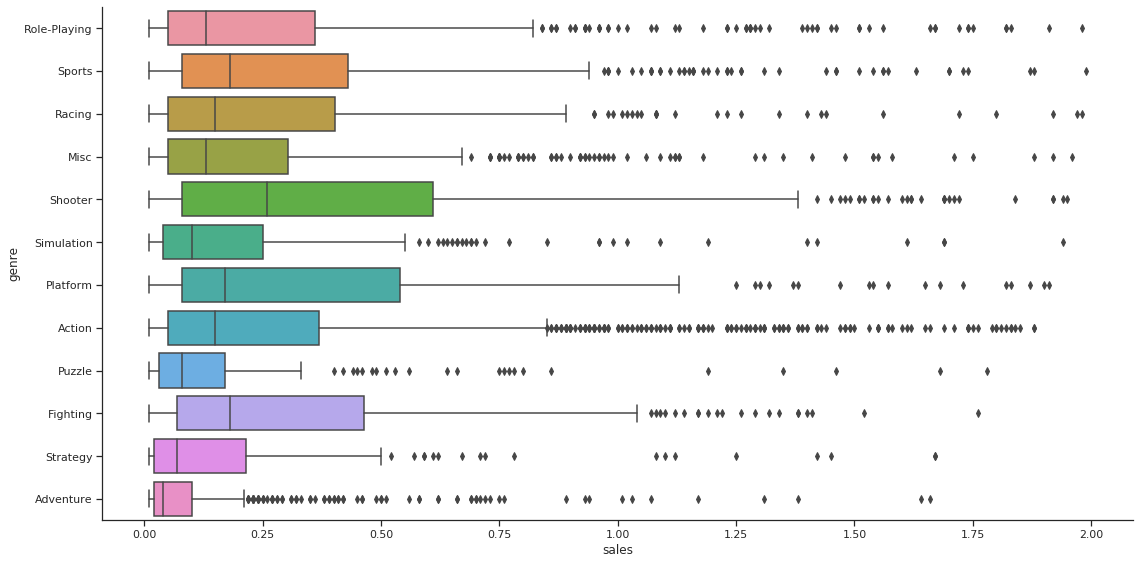

In [114]:
df_q3 = df_games_A.query('sales < 2')
with sns.axes_style(style='ticks'):
    g = sns.catplot('sales', 'genre', data=df_q3, kind="box", orient='h', height=8, aspect=2)

_Самые большие медианные и средние значения у жанров Shooter, Platform, Fighting и Sports. Аутсайдеры это Adventure и Puzzle.  
Хотя больше всего игр производится в жанрах Action, Misc и Sports, а по общему доходу - Action, Shooter и Sports_

### Вывод. <a class="anchor" id="third-conclusion"></a>

1. Определили, что медианный срок жизни платформы это восемь лет.
2. Видно было двухкратное падение продаж и выпуск игр после 2011 года. Вероятно, текущий набор данных неполный.
3. Платформы с наибольшими суммарными продажами это 'PS','DS', 'Wii', 'PS3', 'X360', 'PS2'. Японские корпорации очень хорошо зарабатывают
4. Перспективными платформами считаем Sony PlayStation PS4, Microsoft Xbox XOne и Nintendo Portable 3DS, можно было бы добавить Nintendo WiiU, но наблюдаем катастрофический спад продаж для этой платформы и её предыдущей версии Nintendo Wii. Я могу это объяснить, что мы имеем дело с неполными данными.
5. Медианная цена игры больше на платформах от Microsoft. Хотя если делать сравнение только среди новых Sony PlayStation PS4, Microsoft Xbox XOne, Nintendo Portable 3DS и Nintendo WiiU, то Nintendo WiiU в лидерах, а по среднему значению игры лидирует Microsoft Xbox XOne.
6. Есть слабая корреляция между отзывами критиков и продажами, между отзывами пользователей и продажами нулевая корреляция. Компаниям, которые выпускают игры, нужно оплачивать экспертов, которые объяснят пользователям что им нужно. Также присутствует сильная корреляция между европейским рынком и другими рынками
7. Самые большие медианные и средние значения у жанров Shooter, Platform, Fighting и Sports. Аутсайдеры это Adventure и Puzzle. 
Хотя больше всего игр производится в жанрах Action, Misc и Sports, а по общему доходу - Action, Shooter и Sports

Из википедии:
_Экшен (action в переводе с англ. — «действие») — жанр компьютерных игр, в котором делается упор на эксплуатацию физических возможностей игрока, в том числе координации глаз и рук и скорости реакции. Жанр представлен во множестве разновидностей от файтингов, шутеров и платформеров, которые считаются наиболее важными для жанра, до MOBA и некоторых стратегий в реальном времени, которые возможно отнести к жанру экшен._
Т.е. Shooter, Platform, Fighting это всё поджанры жанра Action. Стои ли нам укрупнять жанры в наборе данных.

В таком случае жанр Action самый прибыльный во всех смыслах.


### Шаг 4. Составьте портрет пользователя каждого региона <a class="anchor" id="fourth-step"></a>

#### Что нужно сделать
<ul>
Определите для пользователя каждого региона (NA, EU, JP):
<li>Самые популярные платформы (топ-5). Опишите различия в долях продаж.</li>
<li>Самые популярные жанры (топ-5). Поясните разницу.</li>
<li>Влияет ли рейтинг ESRB на продажи в отдельном регионе?</li>
</ul>
<ul>
Описание рейтингов ESRB (Entertainment Software Rating Board) https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board
<li>«EC» («Early childhood») — «Для детей младшего возраста»</li>
<li>«E» («Everyone») — «Для всех»</li>
<li>«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»</li>
<li>«T» («Teen») — «Подросткам»</li>
<li>«M» («Mature») — «Для взрослых»</li>
<li>«AO» («Adults Only 18+») — «Только для взрослых»</li>
<li>«RP» («Rating Pending») — «Рейтинг ожидается»</li>
</ul>

_Посторим диаграмму взаимосвязи между реутингом, платформой и продажами_

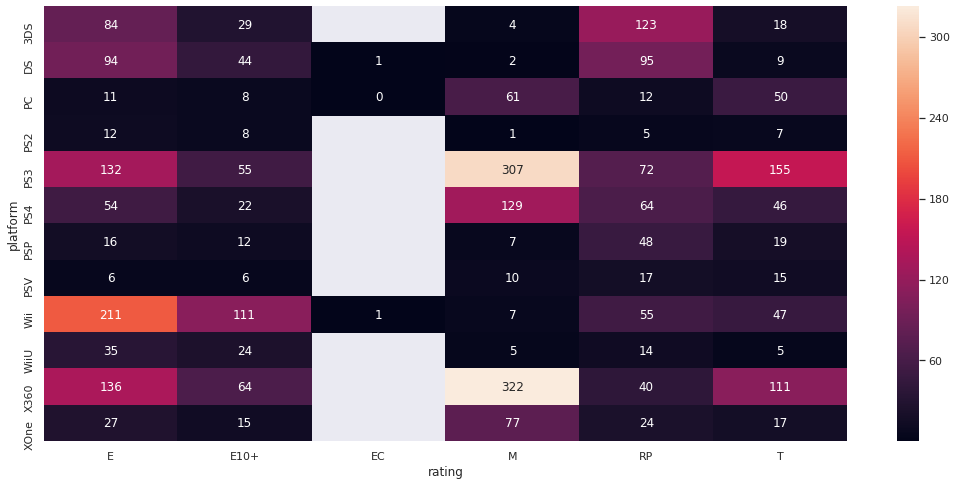

In [140]:
pv_4_2 = df_games_A.pivot_table(index = 'platform', columns = 'rating' , values = 'sales', aggfunc = 'sum')
f, ax = plt.subplots(figsize=(18, 8))
sns.heatmap(pv_4_2, annot=True, fmt=".0f", ax=ax)
plt.show()

_Самые большие продажи в играх с рейтингами для взрозлых и для всех_  
_Посмотрим на самые популярные платформы в регионах и построим графики_

In [142]:
pv_4_1 = df_games_A.pivot_table(index = 'platform', values = ['na_sales','eu_sales','jp_sales'], aggfunc = 'sum')
pv_4_1.style.background_gradient(cmap='Blues')

,eu_sales,jp_sales,na_sales
platform,,,
3DS,61.46,100.62,83.11
DS,54.19,52.11,121.37
PC,84.05,0,41.36
PS2,6.61,2.74,11.68
PS3,256.14,68.39,293.12
PS4,141.09,15.96,108.74
PSP,18.67,50.89,22.41
PSV,13.07,21.84,12.47
Wii,124.66,34.32,237.23


In [150]:
def turn_off_labels(ax, first=True):
    if first == False:
        x_axis = ax.axes.get_xaxis()
        x_label = x_axis.get_label()
        x_label.set_visible(False)
        y_axis = ax.axes.get_yaxis()
        y_label = y_axis.get_label()
        y_label.set_visible(False)         
    else:
        x_axis = ax.axes.get_xaxis()
        x_label = x_axis.get_label()
        x_label.set_visible(False)

In [144]:
def autolabel(rects , df , ax0 , col1): #функция для отображения процентов в подписи к каждому бару на графике
    for rect in rects:
        height1 = rect.get_height()
        label1 = df.loc[df[col1] == height1,'procent']
        ax0.annotate('{:.0%}'.format(label1[0]),
                    xy=(rect.get_x() + rect.get_width() / 2, height1),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom') 

In [145]:
def step4_portrait(df, col1, palette1, title1):
    EU = df.pivot_table('eu_sales', columns=col1, aggfunc='sum').T
    EU['procent'] = EU['eu_sales']/EU['eu_sales'].sum()
    EU = EU.sort_values(by='eu_sales', ascending=False).iloc[0:5]
    EU_plats = EU.index

    JP = df.pivot_table('jp_sales', columns=col1, aggfunc='sum').T
    JP['procent'] = JP['jp_sales']/JP['jp_sales'].sum()
    JP = JP.sort_values(by='jp_sales', ascending=False).iloc[0:5]
    JP_plats = JP.index

    NA = df.pivot_table('na_sales', columns=col1, aggfunc='sum').T
    NA['procent'] = NA['na_sales']/NA['na_sales'].sum()
    NA = NA.sort_values(by='na_sales', ascending=False).iloc[0:5]
    NA_plats = NA.index

    Other = df.pivot_table('other_sales', columns=col1, aggfunc='sum').T
    Other['procent'] = Other['other_sales']/Other['other_sales'].sum()
    Other = Other.sort_values(by='other_sales', ascending=False).iloc[0:5]
    Other_plats = Other.index

    fig = plt.figure(figsize=(17,6))
    ax1 = fig.add_subplot(1,4,1)
    ax1.set_xticklabels(labels = EU_plats, rotation=90, size=14)
    turn_off_labels(ax1, first=True)
    g1 = sns.barplot(x=EU_plats, y=EU['eu_sales'], palette=palette1)
    autolabel(g1.patches, EU, ax1, 'eu_sales')
    
    plt.title('Европейский союз', size=18)
    plt.ylabel('Выручка в $ миллионах', size=16)

    ax2 = fig.add_subplot(1,4,2, sharey=ax1)
    ax2.set_xticklabels(labels = JP_plats, rotation=90, size=14)
    turn_off_labels(ax2, first=False)
    g2 = sns.barplot(x=JP_plats, y=JP['jp_sales'], palette=palette1)
    plt.title('Япония', size=18)
    autolabel(g2.patches, JP, ax2,'jp_sales')
    
    ax3 = fig.add_subplot(1,4,3, sharey=ax1)
    ax3.set_xticklabels(labels = NA_plats, rotation=90, size=14)
    turn_off_labels(ax3, first=False)
    g3 = sns.barplot(x=NA_plats, y=NA['na_sales'], palette=palette1)
    plt.title('Северная Америка', size=18)
    autolabel(g3.patches, NA, ax3, 'na_sales')
    
    ax4 = fig.add_subplot(1,4,4, sharey=ax1)
    ax4.set_xticklabels(labels = Other_plats, rotation=90, size=14)
    turn_off_labels(ax4, first=False)
    g4 = sns.barplot(x=Other_plats, y=Other['other_sales'], palette=palette1)
    plt.title('Другие', size=18)
    autolabel(g4.patches, Other, ax4, 'other_sales')
    
    plt.suptitle(title1, size=22)
    plt.show()

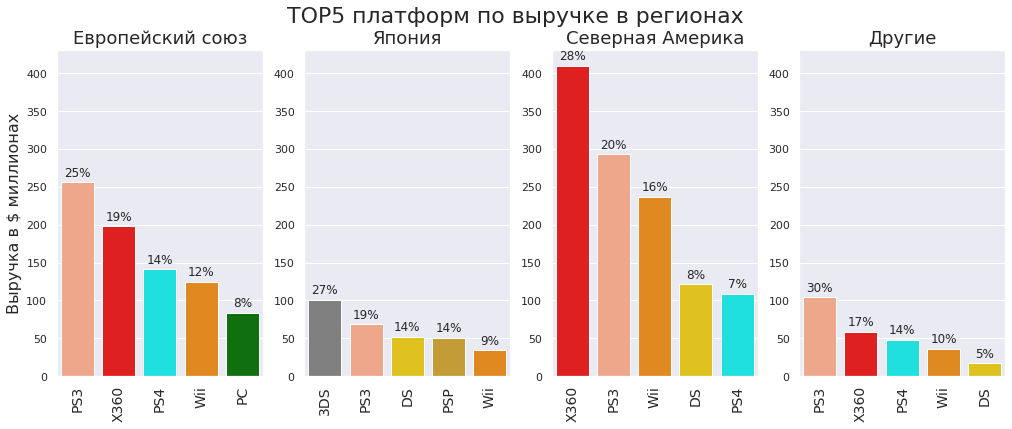

In [146]:
colors =  ({'PSP':"goldenrod", 'PS2':"maroon", 'PS3':"lightsalmon", 'DS':"gold", 'X360':"red",
'Wii':"darkorange", '3DS':"grey", 'PS4':"cyan", 'PC':"green"})
title = 'TOP5 платформ по выручке в регионах'
step4_portrait(df_games_A, 'platform', colors, title)

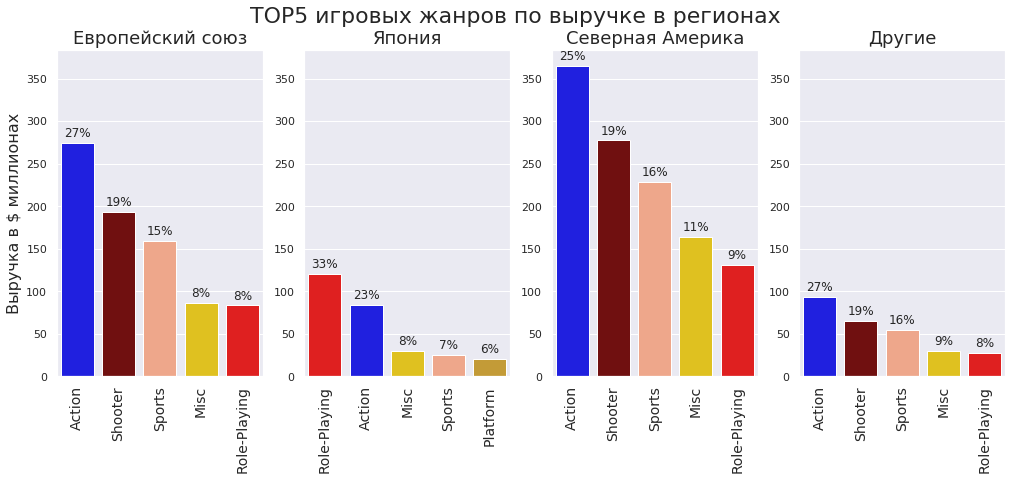

In [149]:
colors = ({'Action':"blue", 'Shooter':"maroon", 'Sports':"lightsalmon", 'Misc':"gold", 'Role-Playing':"red",
          'Adventure':"green", 'Platform':"goldenrod"})
title = 'TOP5 игровых жанров по выручке в регионах'
step4_portrait(df_games_A, 'genre', colors, title)

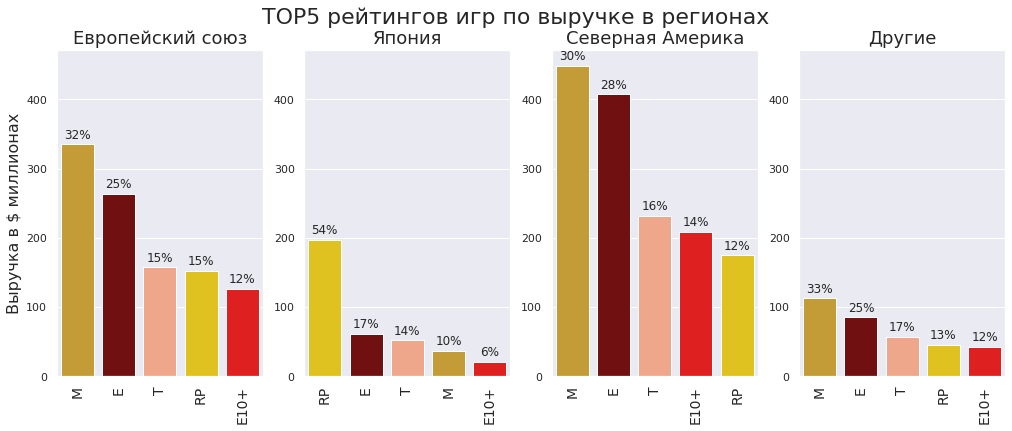

In [147]:
colors = {'M':"goldenrod", 'E':"maroon", 'T':"lightsalmon", 'RP':"gold", 'E10+':"red"}
title = 'TOP5 рейтингов игр по выручке в регионах'
step4_portrait(df_games_A, 'rating', colors, title)

### Вывод. <a class="anchor" id="fourth-conclusion"></a>

#### Самые популярные платформы (топ-5)
1. На японском рынке самые популярные платформы это платформы от японских производителей. И причём это мобильные платформы. 3 и 5 это мобильные платформы.
2. Европейцы больше предпочитают стационарный вариант. И позиции корпорации Sony очень сильны. 2 из 5 это её платформы.
3. Американцы выбирают Microsoft и Sony. В сумме по двум позициям Sony занимает 28%, столько же сколько и лидер - Microsoft. И они немножко любят, как и японцы играть на мобильных платформах - 1 из 5.
4. В других регионах, у корпорации Sony почти половина рынка.  

#### Самые популярные жанры (топ-5). 
1. Япония увлекается ролевыми играми(Role-Playing - RPG) и играми в жанре Action
2. Европейцы больше любят Action и Shooter. А, если воспринимать, жанр Shooter как поджанр Action, то у жанра Action в Европе почти половина рынка
3. В Северной Америке почти до процента аналогичная ситуация с европейским рынком.
4. В других регионах аналогичная ситуация как и в Северной Америке.
Таким образом, только японцы выделяются(выпендриваются)

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?
1. В Японии больше половины это игры с рейтингом RP, т.е по сути без рейтинга. И это понятно. рейтинг американской ассоциации на японском рынке не нужен, у японцем свой рейтинг есть , наверное.
2. По сути всё сводится к тому, что чем больше пользователей могут пользоваться игрой согласно рейтингом, тем больше дохода. Чем больше ограничений, тем меньше дохода

### Шаг 5. Проверьте гипотезы <a class="anchor" id="fifth-step"></a>

#### Что нужно сделать
<ul>
<li>Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;</li>
<li>Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.</li>
</ul>

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам,  
примените метод scipy.stats.ttest_ind (array1, array2, equal_var).  
Методу передают параметры:
<li>array1, array2 — массивы, содержащие выборки;</li>
<li>equal_var (от англ. equal variance, «равная дисперсия») — необязательный параметр, задающий считать ли равными дисперсии выборок. Передаётся как "equal_var = True" или "equal_var = False" (True — считать, False — не считать).</li>

Уровень значимости или p-value  — это суммарная вероятность того, что измеренное эмпирически значение окажется далеко от среднего

Так как выборки по тарифам и по городам получены из одной генеральной совокупности, то параметр equal_var функции scipy.stats.ttest_ind выставим в True.

In [151]:
from scipy import stats as st

def proverka_hypotizy(sample_1,sample_2):
    alpha = .05 # критический уровень статистической значимости
                # если p-value окажется меньше него - отвергнем гипотезу

    results = st.ttest_ind(
        sample_1, 
        sample_2,equal_var = True)

    print('p-значение: {:.2%}'.format(results.pvalue))

    if (results.pvalue < alpha):
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")

_**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**_  
Начнём с формулировки нулевой гипотезы H₀. H₀ всегда формулируется так, чтобы использовать знак равенства.
В нашем случае гипотезы H₀ будет звучать так:
<blockquote>Средние пользовательские рейтинги платформ Xbox One и PC не различаются</blockquote>

Исходя из H₀ формулируется альтернативная гипотеза H₁. Для этой H₀ она звучит как «среднее генеральной совокупности не равно A». В нашем случае гипотезы H₁ будет звучать так:
<blockquote>Средние пользовательские рейтинги платформ Xbox One и PC различаются</blockquote>

In [152]:
proverka_hypotizy(
    df_games_A.query('platform == "XOne"')['user_score'],
    df_games_A.query('platform == "PC"')['user_score'])

p-значение: 40.67%
Не получилось отвергнуть нулевую гипотезу


_**Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.**_  
Начнём с формулировки нулевой гипотезы H₀. H₀ всегда формулируется так, чтобы использовать знак равенства.
В нашем случае гипотезы H₀ будет звучать так:
<blockquote>Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») не различаются</blockquote>

Исходя из H₀ формулируется альтернативная гипотеза H₁. Для этой H₀ она звучит как «среднее генеральной совокупности не равно A». В нашем случае гипотезы H₁ будет звучать так:
<blockquote>Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») различаются</blockquote>

In [153]:
proverka_hypotizy(
    df_games_A.query('genre == "Action"')['user_score'],
    df_games_A.query('genre == "Sports"')['user_score'])

p-значение: 0.00%
Отвергаем нулевую гипотезу


### Вывод. <a class="anchor" id="fifth-conclusion"></a>

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
2. Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») различаются

### Шаг 6. Общий вывод <a class="anchor" id="sixth-step"></a>

1. Проанализировали входной файл. Удалили 0.8% данных, которые нельзя было использовать для анализа. Определили чем и как заполнить пропущенные значения. Заполнили пропущенные значения.
2. Вероятно данные неполные с 2011 года, так как идет двухкратный спад по количеству игр и продажам.
3. Перспективными платформами считаем Sony PlayStation PS4, Microsoft Xbox XOne и Nintendo Portable 3DS
4. На доход от игры влияют рейтинг от ассоциации ESRB и от критиков. Чем шире или старше аудитория согласно рейтингу ESRB, тем больше доход она принесёт.
5. Японский рынок своеобразный. Остальные рынки очень похожи
6. Самые большие медианные и средние значения у жанров Shooter, Platform, Fighting и Sports. Аутсайдеры это Adventure и Puzzle.
Хотя больше всего игр производится в жанрах Action, Misc и Sports, а по общему доходу - Action, Shooter и Sports
